In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [3]:
import json

all_rows = []
with open('../data/ranked-pages.json', 'r') as f:
    for line in f:
        row = json.loads(line)
        all_rows.append(row)

df = pd.DataFrame(all_rows)

In [4]:
df.head()

,bodyContentLength,numberOfHeaders,numberOfLinks,page,position,queryInTitle,titleLength,url
0,6495,9,97,1,17,False,47,http://www.nhlbi.nih.gov/health/health-topics/...
1,2609,4,100,0,10,False,17,https://www.irs.gov/filing
2,19076,4,27,2,25,True,12,http://www.marietta.edu/~mcshaffd/macro/fcam.html
3,3286,42,150,0,9,False,30,http://www.foodnetwork.com/recipes/burritos-re...
4,3985,7,20,1,18,True,59,http://lowbloodpressurehelp.com/


In [5]:
df.drop('position', axis=1).groupby('page').mean()

,bodyContentLength,numberOfHeaders,numberOfLinks,queryInTitle,titleLength
page,,,,,
0,12577.960516,30.792909,276.993554,0.623691,46.130540
1,18703.530261,23.687070,219.347318,0.584594,46.526823
2,11286.468659,21.902332,202.247085,0.589650,45.837464


In [6]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

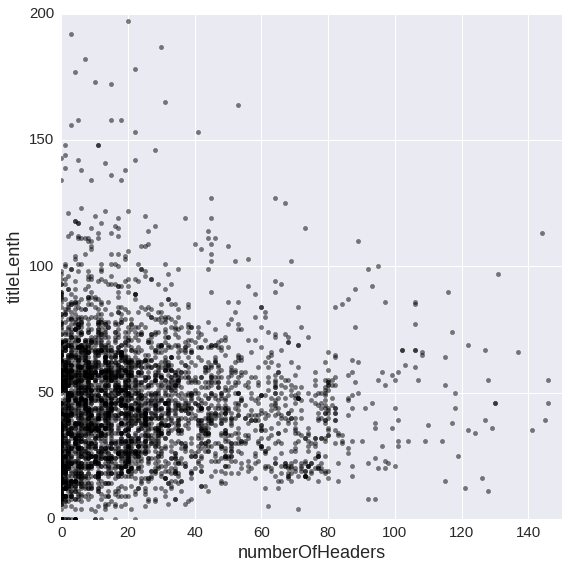

In [7]:
df.plot(x='numberOfHeaders', y='titleLength', kind='scatter', 
        figsize=(8, 8), alpha=0.5, color='black')
plt.ylim(0, 200)
plt.xlim(0, 150)

plt.xlabel('numberOfHeaders', fontsize=18)
plt.ylabel('titleLenth', fontsize=18)

plt.tight_layout()

plt.savefig('img05.png', format='png', dpi=200)
plt.show()

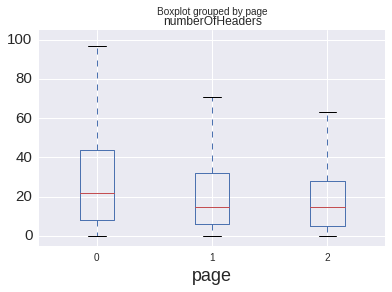

In [8]:
df[df.bodyContentLength > 0].boxplot('numberOfHeaders', by='page')
plt.ylim(-5, 105)
plt.xlabel('page', fontsize=18)
plt.savefig('img06.png', format='png', dpi=200)
plt.show()

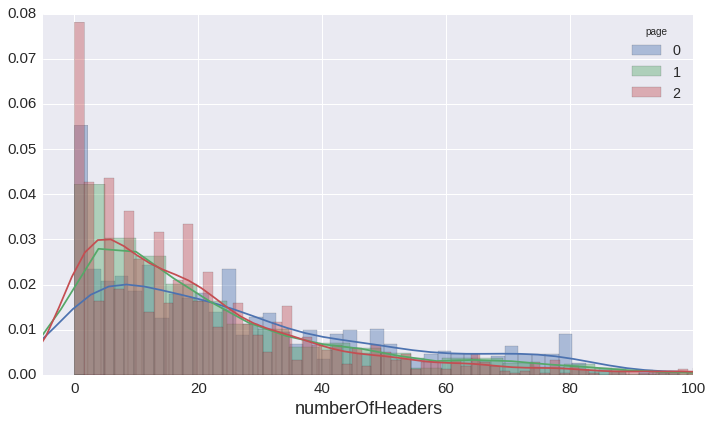

In [9]:
plt.figure(figsize=(10, 6))

valid = df[df.bodyContentLength > 0]
for page, group in valid.groupby('page'):
    sns.distplot(group.numberOfHeaders, bins=150, label=str(page))

plt.legend(title='page', fontsize='x-large')
plt.xlabel('numberOfHeaders', fontsize=18)

plt.xlim(-5, 100)
plt.tight_layout()

plt.savefig('img07.png', format='png', dpi=200)
plt.show()